In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

1. Подберите скорость обучения (eta) и количество итераций

In [1]:
X = np.array([[ 1,  1],
              [ 1,  1],
              [ 1,  2],
              [ 1,  5],
              [ 1,  3],
              [ 1,  0],
              [ 1,  5],
              [ 1, 10],
              [ 1,  1],
              [ 1,  2]])

In [2]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [3]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [4]:
n = X.shape[0]
eta = 0.01
n_iter = 501
W = np.array([1, 0.5])
errors = []
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    errors.append(err)
    for k in range(W.shape[0]):
        W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
    if i % 10 == 0:
        eta /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err, 2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 6.67106886 10.61676385], MSE = 749.71
Iteration #20: W_new = [ 9.49320908 10.25731657], MSE = 648.91
Iteration #30: W_new = [11.85740092  9.83349244], MSE = 570.46
Iteration #40: W_new = [13.86876921  9.46898661], MSE = 508.03
Iteration #50: W_new = [15.59085668  9.15672679], MSE = 457.73
Iteration #60: W_new = [17.07337653  8.88789585], MSE = 416.77
Iteration #70: W_new = [18.35601294  8.65530964], MSE = 383.06
Iteration #80: W_new = [19.47073522  8.45317196], MSE = 355.08
Iteration #90: W_new = [20.44350656  8.27677488], MSE = 331.65
Iteration #100: W_new = [21.29557245  8.12226587], MSE = 311.9
Iteration #110: W_new = [22.044442    7.98646992], MSE = 295.12
Iteration #120: W_new = [22.7046421   7.86675281], MSE = 280.78
Iteration #130: W_new = [23.2883015   7.76091518], MSE = 268.46
Iteration #140: W_new = [23.80560705  7

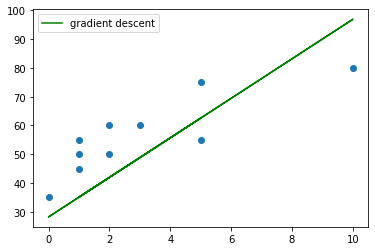

In [7]:
y_pred_grad = X @ W
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_grad, label='gradient descent', c='g')
plt.legend()
plt.show()

Text(0, 0.5, 'MSE')

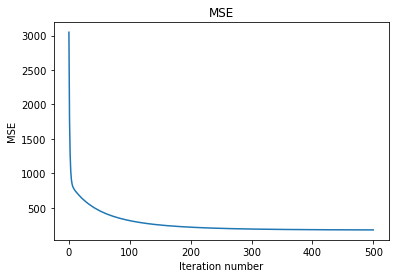

In [8]:
# Визуализируем изменение функционала ошибки
import matplotlib.pyplot as plt
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

2*. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [9]:
n = X.shape[1]

eta = 1e-2 
n_iter = 500

W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= eta * (1/n * 2 * X[:, k] @ (y_pred - y))
#     W -= eta * (1/n * 2 * np.dot(X, y_pred - y))
#     if i % 10 == 0:
#         print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')
    # ИЗМЕНЕНИЯ
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 2        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [ 6.4  19.35], MSE = 3047.75
Iteration #10: W_new = [19.96966932  8.87179137], MSE = 379.6
Iteration #20: W_new = [29.27719328  6.70531799], MSE = 172.93
Iteration #30: W_new = [35.16120834  5.60976141], MSE = 94.66
Iteration #40: W_new = [38.85365942  4.93848587], MSE = 63.9
Iteration #50: W_new = [41.16920131  4.51849616], MSE = 51.81
Iteration #60: W_new = [42.62118483  4.25519525], MSE = 47.05
Iteration #70: W_new = [43.53165976  4.0900943 ], MSE = 45.18
Iteration #80: W_new = [44.10257814  3.98656703], MSE = 44.45
Iteration #90: W_new = [44.46057568  3.9216497 ], MSE = 44.16
Iteration #100: W_new = [44.68506002  3.88094292], MSE = 44.04
Iteration #110: W_new = [44.82582417  3.85541751], MSE = 44.0
Iteration #120: W_new = [44.91409111  3.83941166], MSE = 43.98
Iteration #130: W_new = [44.96943938  3.82937511], MSE = 43.97
Iteration #140: W_new = [45.00414582  3.82308163], 

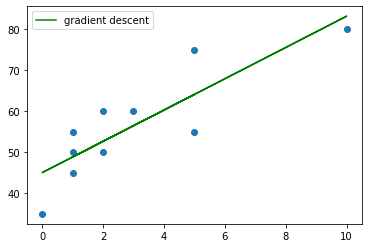

In [10]:
y_pred_grad = X @ W
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_grad, label='gradient descent', c='g')
plt.legend()
plt.show()

3* Вместо того, чтобы задавать количество итераций, задайте другое условие останова алгоритма - когда веса перестают изменяться меньше определенного порога эпсилон.

In [ ]:
n = X.shape[1]
eta = 1e-2 
n_iter = 500
W = np.array([1, 0.5])
W_old = W - 0.0001
epsilon = 0.001

print(f'Number of objects = {n} \
       \nLearning rate = {eta} \
       \nInitial weights = {W} \n')

while W[0] - W_old[0] < epsilon and W[1] - W_old[1] < epsilon:
#for i in range(n_iter):
    y_pred = np.dot(X, W)
    err = calc_mse(y, y_pred)
    #print(W)
    W_old = W
    W -= eta * (1/n * 2 * np.dot(X.T, y_pred - y))
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')
        
y_pred_grad = X @ W
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_grad, label='gradient descent', c='g')
plt.legend()
plt.show()